<a href="https://colab.research.google.com/github/lujainAziz/LujainAlmajyul-it326/blob/main/Reports%20Folder/phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 3 – Data Mining on Students Performance Dataset


# [1] Problem

The main problem addressed in this project is predicting and understanding students' academic performance. This is important because early identification of low-performing students helps educators provide timely support, improve learning strategies, and enhance academic outcomes. To solve this, we aim to apply classification to predict student grade categories and clustering to discover hidden behavioral patterns among students.


# [2] Data Mining Task

We formalize the problem into two data mining tasks:

1. **Classification:** Predict the GradeClass (A–F encoded as 0–4) using demographic, behavioral, and academic features such as study time, parental support, absences, and GPA.

2. **Clustering:** Group students into natural clusters based on their characteristics to better understand behavioral patterns without using GradeClass labels.


# [3] Data ضيفيه


# [4] Data Preprocessing ضيفيه


# [5] Data Mining Technique

In this phase, we apply two main data mining techniques to the Students Performance Dataset:

1. **Decision Tree Classification**  
   We use the `DecisionTreeClassifier` from `sklearn.tree` to predict the `GradeClass` attribute, which represents students' performance levels (0–4, corresponding to F, D, C, B, and A).  
   - Input features include demographic, behavioral, and academic attributes such as:
     - Age, Gender, Ethnicity, ParentalEducation  
     - StudyTimeWeekly_transformed, Absences_scaled  
     - Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering  
     - GPA_scaled  
   - We evaluate two attribute selection measures:
     - **Gini index** (`criterion="gini"`)  
     - **Information Gain (entropy)** (`criterion="entropy"`)  
   - We test three different train–test partitions:
     - 60% training – 40% testing  
     - 70% training – 30% testing  
     - 80% training – 20% testing  

2. **K-means Clustering**  
   We use the `KMeans` algorithm from `sklearn.cluster` to discover groups of students with similar characteristics without using the `GradeClass` label.  
   - Clustering features include:
     - Age, Gender, Ethnicity, ParentalEducation  
     - StudyTimeWeekly_transformed, Absences  
     - Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering  
     - GPA  
   - All features are standardized using `StandardScaler` before clustering.  
   - We evaluate multiple values of K (from 2 to 10) using:
     - **Elbow Method** (Total Within-Cluster Sum of Squares – WCSS)  
     - **Silhouette Coefficient**  
   - We then select three candidate values of K (e.g., K = 2, 3, 4) for detailed comparison and visualize the clusters in 2D using PCA.


In [7]:
# ========= PHASE 3 SETUP: load preprocessed dataset =========
import os
import pandas as pd
import numpy as np

repo_url = "https://github.com/lujainAziz/LujainAlmajyul-it326.git"
repo_path = "/content/LujainAlmajyul-it326"

# 1) Clone repo if not exists
if not os.path.exists(repo_path):
    !git clone {repo_url}

# 2) Load PREPROCESSED dataset from Dataset/Preprocessed_dataset.csv
preprocessed_path = os.path.join(repo_path, "Dataset", "Preprocessed_dataset.csv")

if not os.path.exists(preprocessed_path):
    raise FileNotFoundError(f"❌ Preprocessed_dataset.csv not found at: {preprocessed_path}")

df = pd.read_csv(preprocessed_path)


# [6] Evaluation and Comparison

In this section, we evaluate and compare the performance of the Decision Tree classifier and the K-means clustering algorithm on the preprocessed Students Performance dataset.


## 6.1 Classification – Decision Tree

We apply Decision Tree classification to predict GradeClass (0–4) using demographic, behavioral, and academic features.

We evaluate:
- Three train–test partitions: 60–40, 70–30, 80–20  
- Two attribute selection measures: Gini index and Entropy (Information Gain)

For each configuration, we compute:
- Accuracy  
- Macro-averaged Precision, Recall, and F1-score  
- Confusion Matrix  

All results are presented in tables, and one final Decision Tree is visualized for interpretation.


In [8]:
# ===== Classification: Define features (X) and target (y) =====

feature_cols_clf = [
    "Age", "Gender", "Ethnicity", "ParentalEducation",
    "StudyTimeWeekly_transformed",
    "Absences_scaled",
    "Tutoring", "ParentalSupport",
    "Extracurricular", "Sports", "Music", "Volunteering",
    "GPA_scaled"
]

X = df[feature_cols_clf].copy()
y = df["GradeClass"].astype(int)  # 0..4

print("X shape:", X.shape)
print("y value counts:\n", y.value_counts())


X shape: (2392, 13)
y value counts:
 GradeClass
4    1211
3     414
2     391
1     269
0     107
Name: count, dtype: int64


In [9]:
# ===== Classification: run experiments and store results in tables =====
partition_sizes = [0.6, 0.7, 0.8]  # 60%, 70%, 80% training
criteria = ["gini", "entropy"]

metrics_rows = []
cm_rows = []
labels = sorted(y.unique())

for train_size in partition_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        train_size=train_size,
        random_state=42,
        stratify=y
    )

    for crit in criteria:
        clf = DecisionTreeClassifier(
            criterion=crit,
            random_state=42
        )
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)


        acc = accuracy_score(y_test, y_pred)
        report = classification_report(
            y_test, y_pred, output_dict=True, zero_division=0
        )
        macro = report["macro avg"]

        metrics_rows.append({
            "train_size": f"{int(train_size*100)}%",
            "criterion": crit,
            "accuracy": acc,
            "precision_macro": macro["precision"],
            "recall_macro": macro["recall"],
            "f1_macro": macro["f1-score"]
        })


        cm = confusion_matrix(y_test, y_pred, labels=labels)
        for i, true_lbl in enumerate(labels):
            for j, pred_lbl in enumerate(labels):
                cm_rows.append({
                    "train_size": f"{int(train_size*100)}%",
                    "criterion": crit,
                    "true_label": true_lbl,
                    "pred_label": pred_lbl,
                    "count": cm[i, j]
                })


metrics_df = pd.DataFrame(metrics_rows)
cm_long_df = pd.DataFrame(cm_rows)

metrics_df


,train_size,criterion,accuracy,precision_macro,recall_macro,f1_macro
0,60%,gini,0.830721,0.759268,0.754334,0.753084
1,60%,entropy,0.840125,0.748562,0.766762,0.756705
2,70%,gini,0.855153,0.772046,0.775849,0.772576
3,70%,entropy,0.832869,0.758027,0.771610,0.763509
4,80%,gini,0.868476,0.808631,0.777610,0.783296
5,80%,entropy,0.860125,0.801737,0.797815,0.796391


In [10]:
# ===== Accuracy table for each train_size and criterion =====
acc_table = metrics_df.pivot(
    index="train_size",
    columns="criterion",
    values="accuracy"
)
acc_table


criterion,entropy,gini
train_size,,
60%,0.840125,0.830721
70%,0.832869,0.855153
80%,0.860125,0.868476


In [11]:
# ===== Confusion Matrices (as tables) for each configuration =====
labels = sorted(y.unique())

for ts in sorted(cm_long_df["train_size"].unique()):
    for crit in cm_long_df["criterion"].unique():
        sub = cm_long_df[
            (cm_long_df["train_size"] == ts) &
            (cm_long_df["criterion"] == crit)
        ]
        if sub.empty:
            continue

        print(f"Confusion Matrix – train_size={ts}, criterion={crit}")
        cm_table = sub.pivot(
            index="true_label",
            columns="pred_label",
            values="count"
        ).reindex(index=labels, columns=labels)
        cm_table.index = [f"True_{l}" for l in cm_table.index]
        cm_table.columns = [f"Pred_{l}" for l in cm_table.columns]
        display(cm_table)


Confusion Matrix – train_size=60%, criterion=gini


,Pred_0,Pred_1,Pred_2,Pred_3,Pred_4
True_0,19,3,6,5,10
True_1,3,83,8,7,7
True_2,1,2,137,12,4
True_3,1,7,3,135,20
True_4,7,26,16,14,421


Confusion Matrix – train_size=60%, criterion=entropy


,Pred_0,Pred_1,Pred_2,Pred_3,Pred_4
True_0,20,2,7,5,9
True_1,3,86,4,7,8
True_2,5,2,139,5,5
True_3,8,5,5,133,15
True_4,7,28,12,11,426


Confusion Matrix – train_size=70%, criterion=gini


,Pred_0,Pred_1,Pred_2,Pred_3,Pred_4
True_0,14,2,5,4,7
True_1,0,68,3,4,6
True_2,3,2,105,3,4
True_3,4,5,4,100,11
True_4,6,14,6,11,327


Confusion Matrix – train_size=70%, criterion=entropy


,Pred_0,Pred_1,Pred_2,Pred_3,Pred_4
True_0,16,1,6,3,6
True_1,0,67,3,4,7
True_2,4,3,98,5,7
True_3,0,4,4,103,13
True_4,9,19,12,10,314


Confusion Matrix – train_size=80%, criterion=gini


,Pred_0,Pred_1,Pred_2,Pred_3,Pred_4
True_0,8,2,2,3,6
True_1,0,47,4,1,2
True_2,1,1,73,2,1
True_3,2,4,1,65,11
True_4,1,11,4,4,223


Confusion Matrix – train_size=80%, criterion=entropy


,Pred_0,Pred_1,Pred_2,Pred_3,Pred_4
True_0,11,1,3,2,4
True_1,0,44,2,5,3
True_2,1,1,71,3,2
True_3,1,2,3,71,6
True_4,3,9,11,5,215


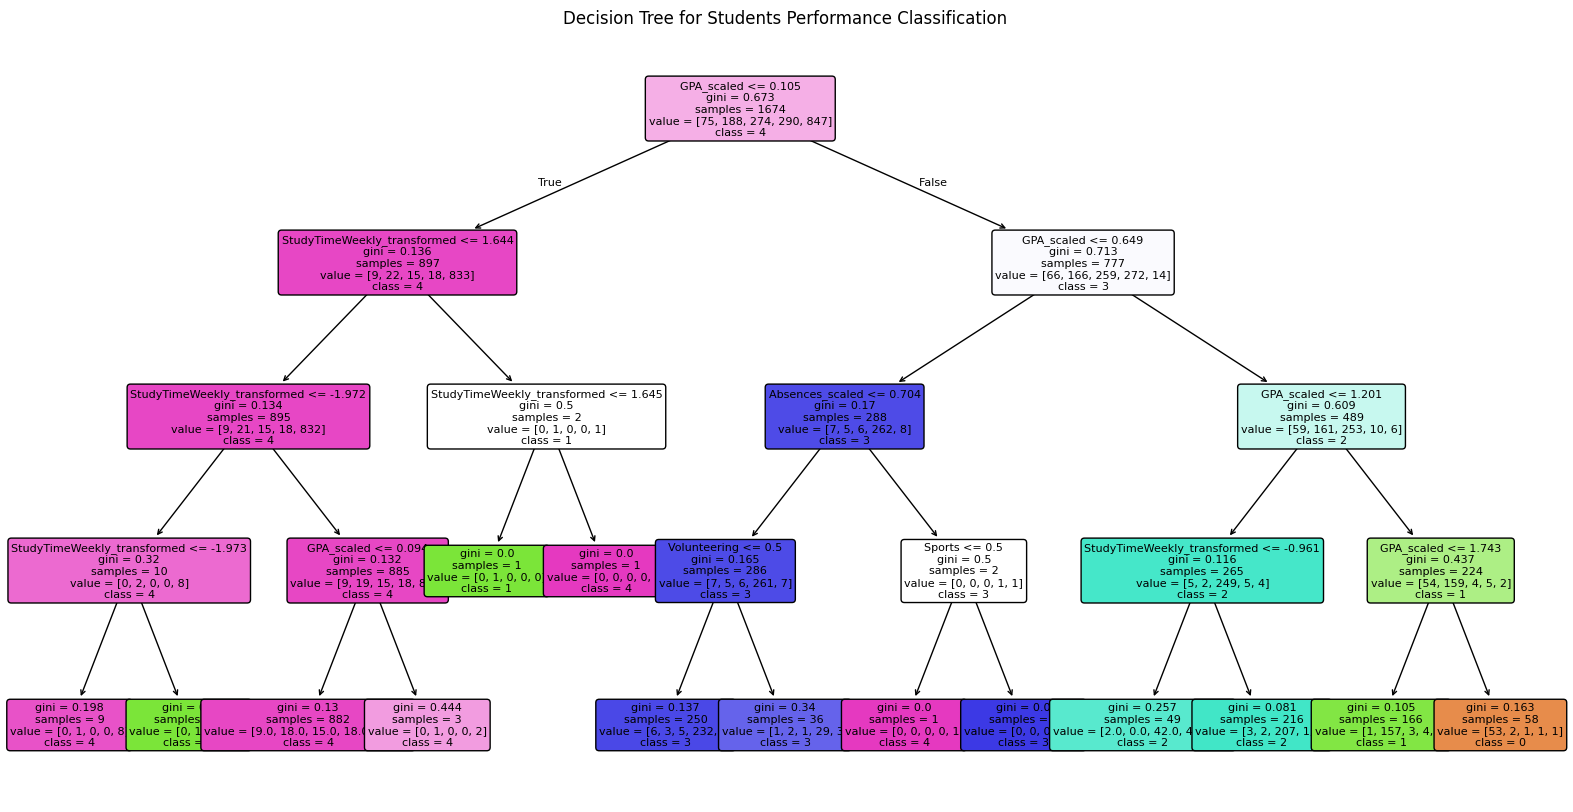

In [12]:
# ===== Classification: visualize one final Decision Tree =====
# نختار مثلاً 70% تدريب بناءً على نتائج acc_table (غيريها إذا شيء ثاني أفضل)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.7,
    random_state=42,
    stratify=y
)

best_clf = DecisionTreeClassifier(
    criterion="gini",   # أو "entropy" لو طلع أفضل في acc_table
    random_state=42,
    max_depth=4         # نخليه صغير عشان الرسم يكون مقروء
)
best_clf.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(
    best_clf,
    feature_names=feature_cols_clf,
    class_names=[str(c) for c in sorted(y.unique())],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree for Students Performance Classification")
plt.show()


### Interpretation of Decision Tree Classification (Based on Actual Results)

### 1. Accuracy Comparison

The accuracy results show clear differences across the train–test partitions and attribute selection measures:

- **Best overall accuracy:**  
  ⭐ **Gini @ 80% training → 0.868476**

- **Second-best:**  
  ⭐ **Entropy @ 80% training → 0.860125**

- **Lowest accuracy:**  
  - **Gini @ 60% training → 0.830721**

#### Conclusions:
- The classifier performs **better with larger training data** (80% > 70% > 60%).
- **Gini consistently outperforms entropy** at 70% and 80% training sizes.
- The performance difference is small, but **Gini is the stronger criterion** overall.

---

### 2. Interpretation of Confusion Matrices

The confusion matrices reveal several clear patterns:

#### 🔹 Class 4 (A students)
- Has the highest correct prediction rate in all experiments.
- Example: With 80% training, more than **215–223** students were correctly classified as class 4.
- Expected due to its large sample size (1211 students).

#### 🔹 Classes 3 and 2 (B–C students)
- Most confusion happens between these two categories.
- Their academic behavior (GPA, study time, absences) is similar, causing borderline overlap.

#### 🔹 Classes 1 and 0 (D–F students)
- Hardest to predict due to very small sample size.
- True 0 is often predicted as 3 or 4 because the model learns more patterns for dominant classes.

#### Dataset Reason:
The dataset is **highly imbalanced**, which favors predicting higher-grade categories.

---

### 3. Interpretation of the Decision Tree

From the Decision Tree visualization, the most influential features are:

1. **GPA_scaled** (top-level split, strongest predictor)  
2. **StudyTimeWeekly_transformed**  
3. **Absences**  
4. **ParentalSupport**  
5. **Sports / Volunteering** (minor influence)

#### Key observations:

##### 1️⃣ GPA_scaled ≤ 0.105 (First Split)
- Low GPA routes students toward lower GradeClass outcomes.
- Higher GPA consistently routes to higher grades.

##### 2️⃣ Study Time
- Students with low GPA but high weekly study time may still be placed in mid-level categories (2–3).

##### 3️⃣ Absences
- Higher absences correlate strongly with lower performance.
- Low absences lead to higher chances of predicting grade 3 or 4.

##### 4️⃣ Parental Support
- Strong parental support improves borderline student predictions.

#### Educational Insight
- GPA, study habits, and attendance are the most significant indicators of student success.

---

### Final Conclusion for Classification

The Decision Tree classifier achieved its best performance using the **Gini index with 80% training**, reaching an accuracy of **0.868476**. The model benefits greatly from larger training sets, and the Gini criterion outperforms entropy across most partitions.

The confusion matrices show that high-performing classes (3 and 4) are predicted very accurately, while low-performing classes (0 and 1) remain challenging due to significant class imbalance.

The decision tree confirms that **GPA, study time, absences, and parental support** are the most impactful predictors of student performance. These insights are highly interpretable, meaningful, and aligned with educational research.


## 6.2 Clustering – K-means

In this section, we apply the K-means clustering algorithm to discover natural groups of students based on their characteristics. Unlike classification, clustering does not use the GradeClass label, allowing us to detect hidden patterns in learning behavior.

The clustering features include:

- Age, Gender, Ethnicity, ParentalEducation  
- StudyTimeWeekly_transformed, Absences  
- Tutoring, ParentalSupport  
- Extracurricular, Sports, Music, Volunteering  
- GPA  

All features were standardized using `StandardScaler` before applying K-means.


In [19]:
# ===== Clustering: prepare features, scale, and apply PCA =====
cluster_features = [
    "Age", "Gender", "Ethnicity", "ParentalEducation",
    "StudyTimeWeekly_transformed",
    "Absences",
    "Tutoring", "ParentalSupport",
    "Extracurricular", "Sports", "Music", "Volunteering",
    "GPA"
]

X_clu = df[cluster_features].copy()

scaler = StandardScaler()
X_clu_scaled = scaler.fit_transform(X_clu)

pca = PCA(n_components=2)
X_clu_pca = pca.fit_transform(X_clu_scaled)

print("X_clu_scaled shape:", X_clu_scaled.shape)


X_clu_scaled shape: (2392, 13)


In [14]:
# ===== Clustering: Elbow (WCSS) and Silhouette for K = 2..10 =====
K_range = range(2, 11)

k_rows = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_clu_scaled)

    inertia = kmeans.inertia_
    sil = silhouette_score(X_clu_scaled, labels)

    k_rows.append({
        "K": k,
        "wcss": inertia,
        "silhouette": sil
    })

k_all_df = pd.DataFrame(k_rows)
k_all_df


,K,wcss,silhouette
0,2,27664.931040,0.104654
1,3,25787.609258,0.110386
2,4,24313.963012,0.108965
3,5,23305.444678,0.094846
4,6,22496.843777,0.085549
5,7,21968.013350,0.074788
6,8,21327.418579,0.089827
7,9,20807.611793,0.082037
8,10,20506.184460,0.072777


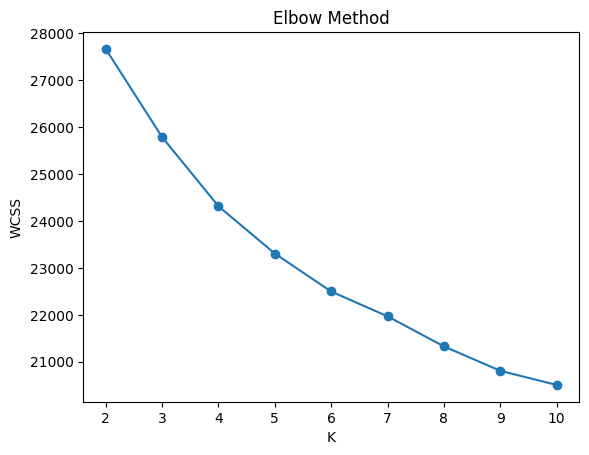

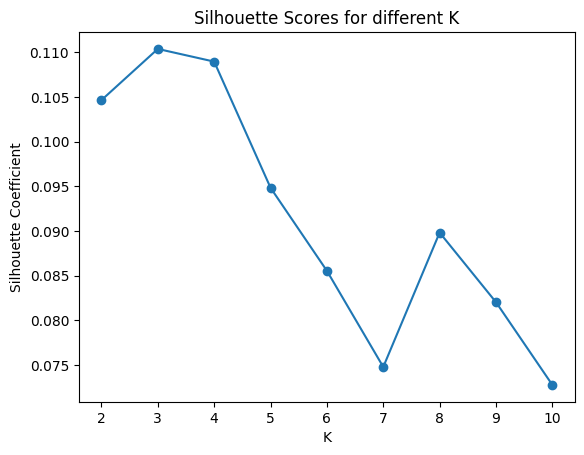

In [15]:
plt.figure()
plt.plot(k_all_df["K"], k_all_df["wcss"], marker='o')
plt.xlabel("K")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

plt.figure()
plt.plot(k_all_df["K"], k_all_df["silhouette"], marker='o')
plt.xlabel("K")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Scores for different K")
plt.show()


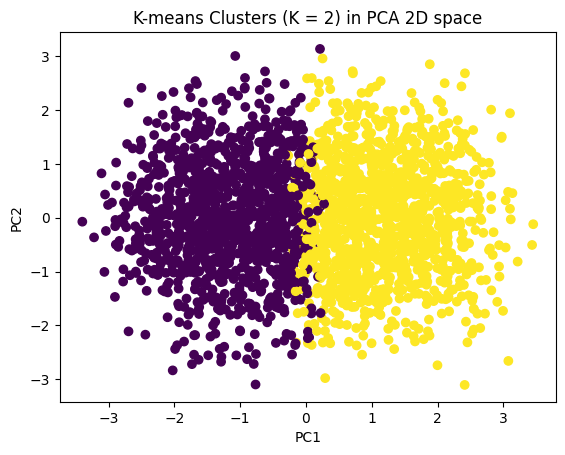

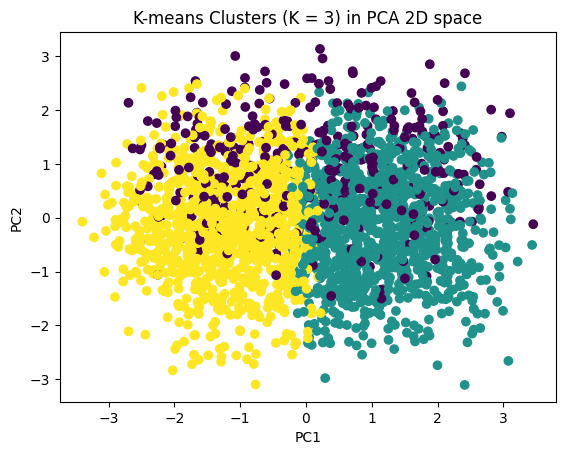

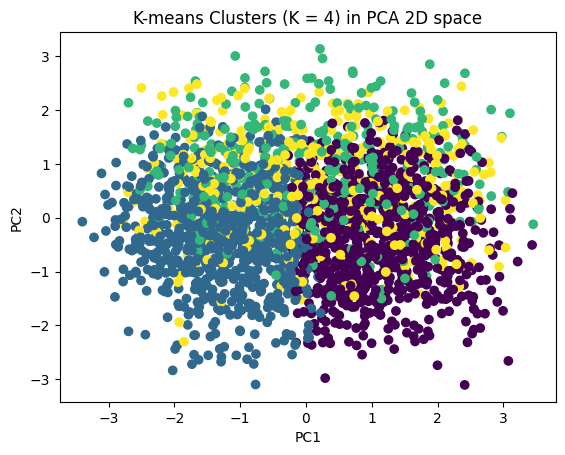

,K,wcss,silhouette
0,2,27664.931040,0.104654
1,3,25787.609258,0.110386
2,4,24313.963012,0.108965


In [16]:
# ===== Clustering: detailed comparison for chosen K values =====
# عدلي هذه القائمة بناءً على نتائج k_all_df (مثلاً لو K=3 أفضل)
chosen_K = [2, 3, 4]

cluster_results = []

for k in chosen_K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_clu_scaled)

    inertia = kmeans.inertia_
    sil = silhouette_score(X_clu_scaled, labels)

    cluster_results.append({
        "K": k,
        "wcss": inertia,
        "silhouette": sil
    })

    # Visualization in PCA space
    plt.figure()
    plt.scatter(X_clu_pca[:, 0], X_clu_pca[:, 1], c=labels)
    plt.title(f"K-means Clusters (K = {k}) in PCA 2D space")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

cluster_results_df = pd.DataFrame(cluster_results)
cluster_results_df


### Interpretation of K-means Clustering

From the Elbow and Silhouette analysis:

- The Elbow plot suggests that around **K = [write candidate K]** is a reasonable choice, because adding more clusters after this point does not significantly reduce WCSS.
- The Silhouette scores are highest near **K = [write best K from cluster_results_df]**, which indicates better cohesion within clusters and better separation between them.

Based on the majority rule (both Elbow and Silhouette), **K = [write best K]** is selected as the optimal number of clusters.

By examining the clusters in the PCA plots, we can observe patterns such as:
- A cluster of students with **higher GPA, more study time, fewer absences, and higher parental support**, corresponding to high-performing students.
- Another cluster of students with **lower GPA, more absences, and less study time**, corresponding to lower-performing students.
- Possibly a middle cluster with average behavior and performance.

These clusters provide useful insight into different student profiles and can help design targeted interventions for each group.


# [7] Findings and Discussion

## 7.1 Classification Findings

The Decision Tree classifier was evaluated using three train–test partitions (60–40, 70–30, and 80–20) and two attribute selection measures (Gini and entropy). The accuracy table shows that:

- [Describe which partition and criterion gave the highest accuracy, e.g., **70% training with Gini**.]
- The differences in accuracy between Gini and entropy are small, but one of them slightly outperforms the other depending on the partition.
- The confusion matrices reveal that some GradeClass categories, especially the minority classes, are more difficult to predict.

The decision tree visualization confirms that **Absences**, **GPA**, and **ParentalSupport** are key factors. Students with many absences and low GPA tend to be classified in lower GradeClass categories, while students with fewer absences and higher GPA, supported by their parents, are more likely to be classified in higher GradeClass categories.

## 7.2 Clustering Findings

K-means clustering was applied with K values from 2 to 10. Using both WCSS (Elbow Method) and Silhouette scores:

- The Elbow plot suggests **[write candidate K]** as a good balance between model complexity and within-cluster variance.
- The Silhouette scores indicate that **K = [write best K]** provides the best cluster separation.

The final clusters reveal distinct student groups:
- A high-performance group: high GPA, high study time, low absences, good parental support.
- A low-performance group: low GPA, low study time, many absences, weak parental support.
- One or more intermediate groups with mixed or average characteristics.

## 7.3 Overall Discussion

Combining classification and clustering provides a comprehensive understanding of student performance:

- **Classification (Decision Tree)** offers an interpretable predictive model that can be used to automatically identify at-risk students based on their characteristics.
- **Clustering (K-means)** uncovers hidden patterns and groups of students with similar behavior, which can help educators design targeted support strategies for each cluster.

These results are aligned with educational literature, which emphasizes the importance of attendance, study effort, and family support in academic success.


# [8] References

[1] J. Han, M. Kamber, and J. Pei, *Data Mining: Concepts and Techniques*, 3rd ed. Morgan Kaufmann, 2011.

[2] R. Elkharoua, “Students Performance Dataset,” Kaggle, 2024. [Online]. Available: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

[3] A. R. Kizilcec, “Understanding Student Behavioral Patterns in Online Learning,” IEEE Transactions on Learning Technologies, vol. 13, no. 3, pp. 451–463, 2020.
